In [5]:
%reload_ext autoreload
%autoreload 2

from npfd.models.base import HiddenMarkovModel
from npfd import data

from npfd import visualization as viz


In [6]:
# Make datasets
X_train, X_val, y_train, y_val = data.dataset.make_dataset('db2')

X_adapt, X_test, y_adapt, y_test = data.dataset.make_dataset('db3', test_size=0.4, clean_interim_dir=False)

INFO:root:Converting malte-uhma raw files to HTK format ...
INFO:root:Generating script (.scp) files...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...
INFO:root:Adding deltas and acelerations...
INFO:root:Test files:	20.0
INFO:root:Train files:	326.0
INFO:root:Converting real raw files to HTK format ...
INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...


In [17]:
X_test

{'script_file': PosixPath('/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp'),
 'count': 91,
 'id': 'test_D_A.real'}

In [24]:
# gdt = 3
minvar = 3.5
varflo = 2.6
# wip = 0
gsf = 32

model = HiddenMarkovModel()
model.initialize(X_train, init_method='HCompV', minimum_variance=minvar, variance_floor=varflo)

model.train(X_train, y_train, word_insertion_penalty=wip, grammar_scale_factor=gsf)

for i in range(1, gdt+1):
    
    model.edit([f'MU {2**i} {{*.state[2-4].mix}}'])
    model.train(X_train, y_train, word_insertion_penalty=wip, grammar_scale_factor=gsf)

model.adapt(X_adapt, y_adapt, gaussian_duplication_times=gdt)

results = model.test(X_test, y_test, word_insertion_penalty=wip, grammar_scale_factor=gsf)

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks
Pruning-Off

Pruning-Off



INFO:root:Most trained model: 3
INFO:root:Editing model 3
INFO:root:Most trained model: 4
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 7
INFO:root:Editing model 7
INFO:root:Most trained model: 8
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 11
INFO:root:Editing model 11
INFO:root:Most trained model: 12
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Most trained model: 15
INFO:root:Testing model: 15


Pruning-Off

/home/gfogwil/Documentos/Facultad/Tesis/programs/htk/HTKTools/HVite -C /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/config -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/15/macros -H /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/models/hmm/15/hmmdefs -p 0.0000000000 -s 32.0000000000 -A -T 0 -S /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp -i /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf -w /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/wdnet /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/dict /home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc/monophones 

====================== HTK Results Analysis =======================
  Date: Sun Jul  4 17:51:33 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data

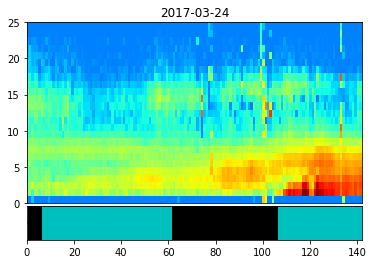

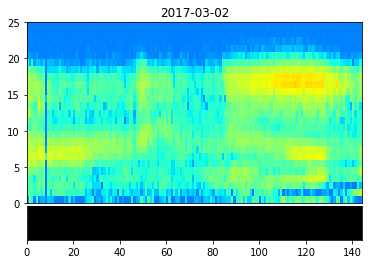

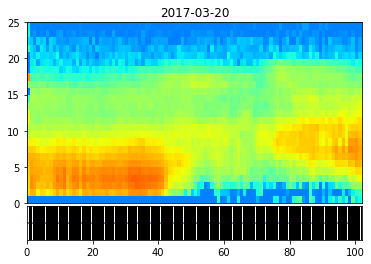

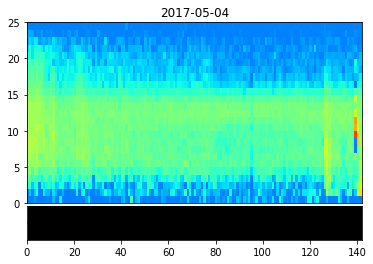

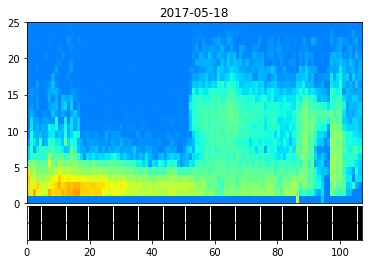

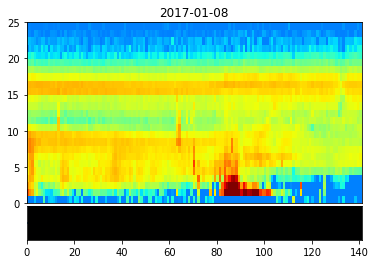

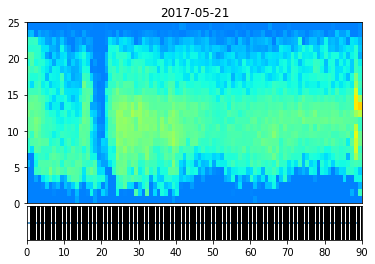

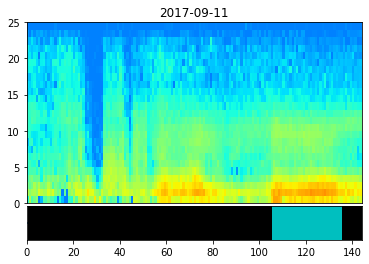

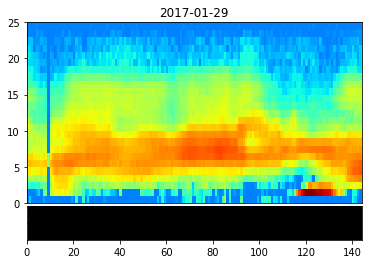

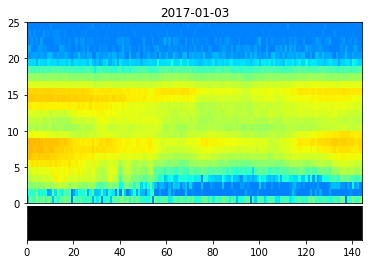

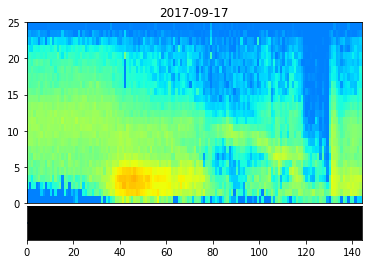

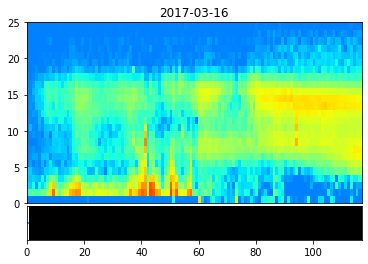

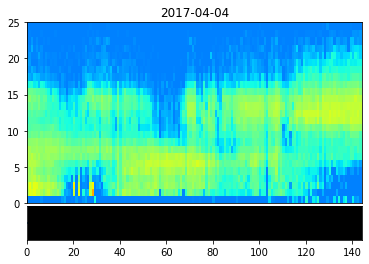

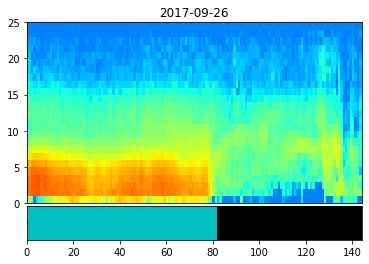

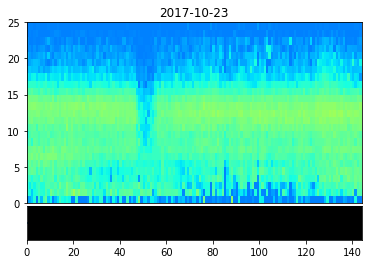

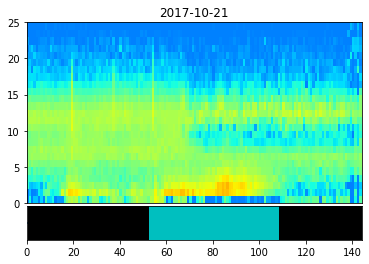

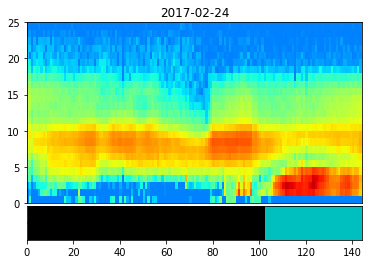

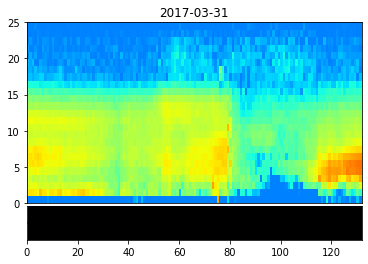

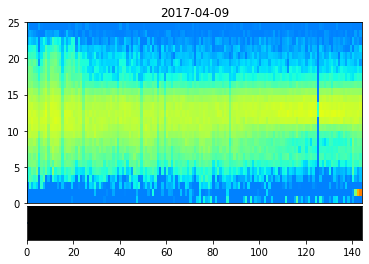

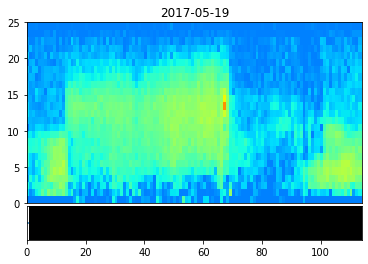

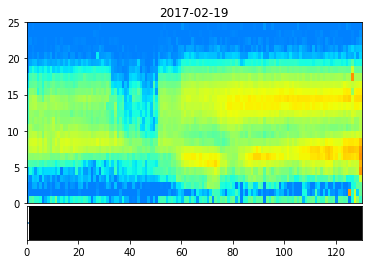

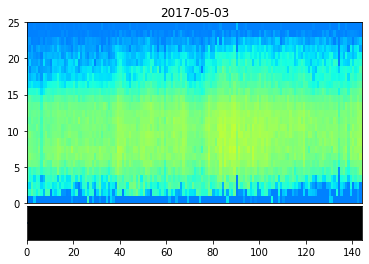

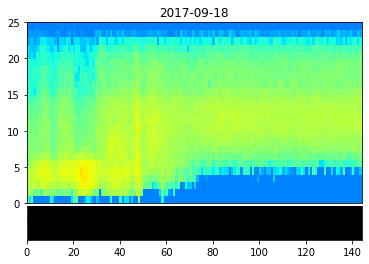

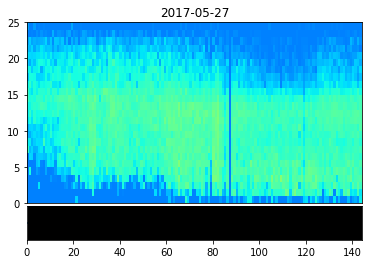

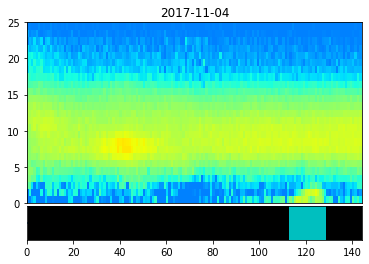

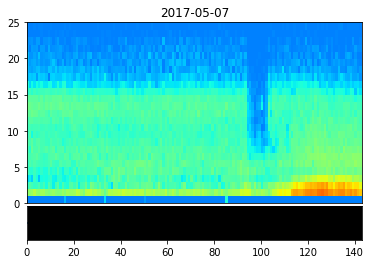

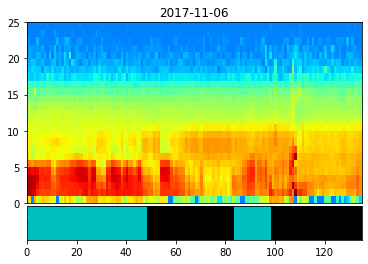

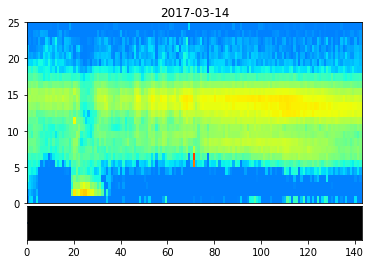

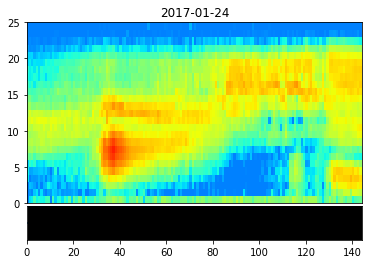

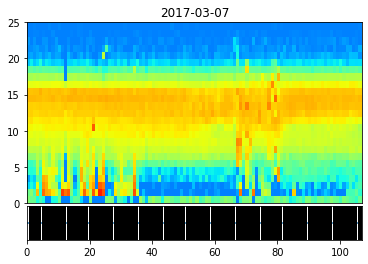

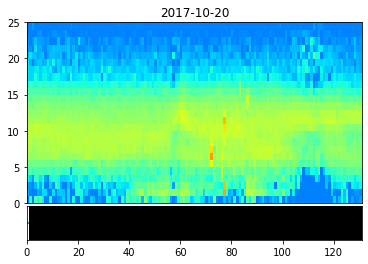

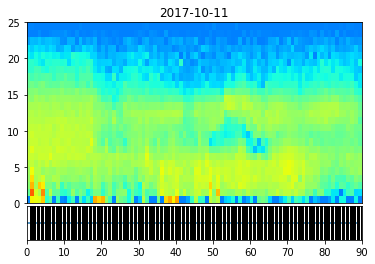

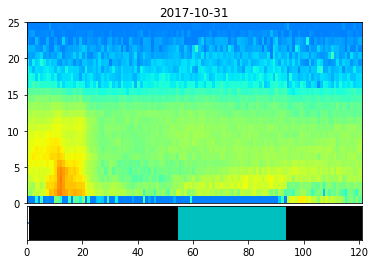

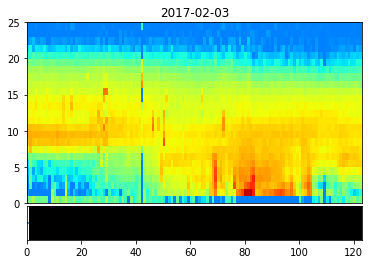

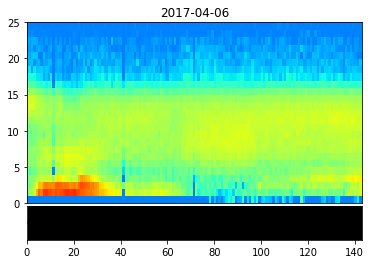

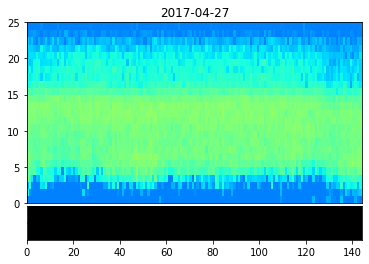

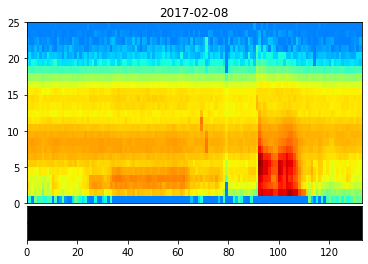

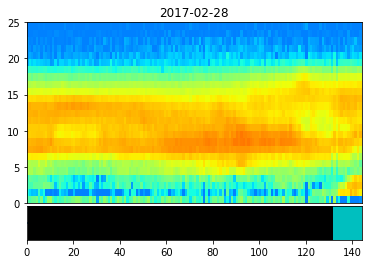

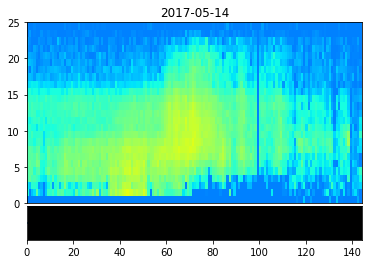

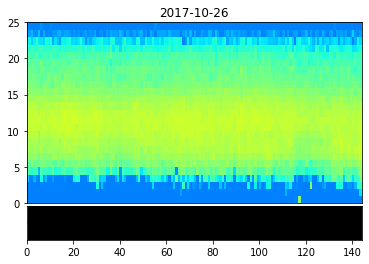

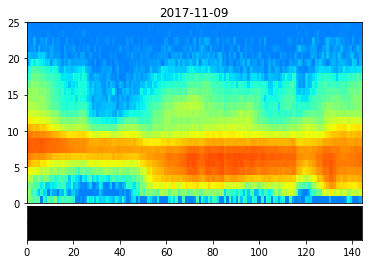

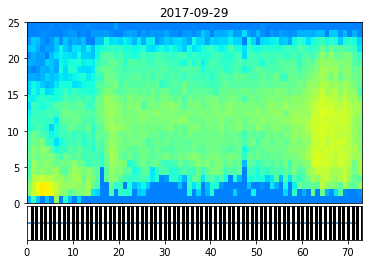

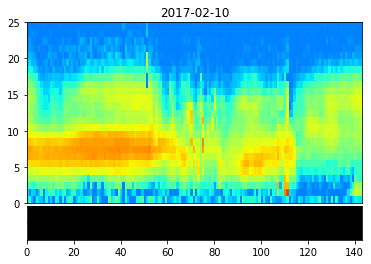

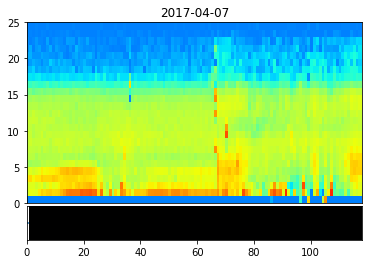

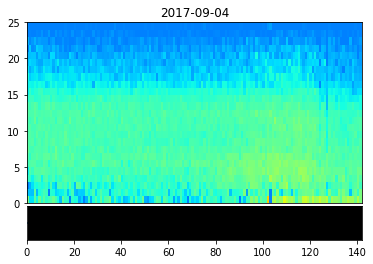

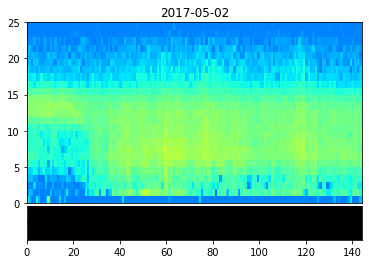

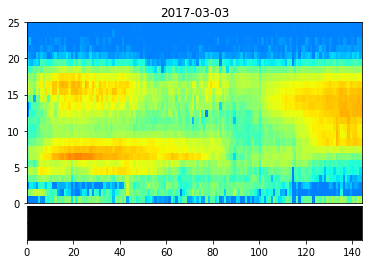

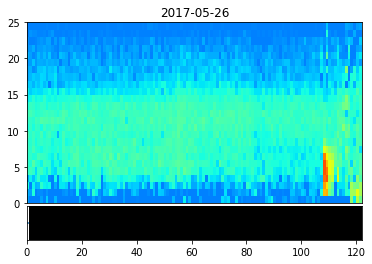

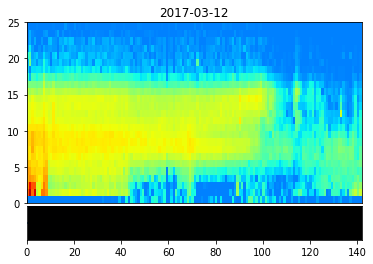

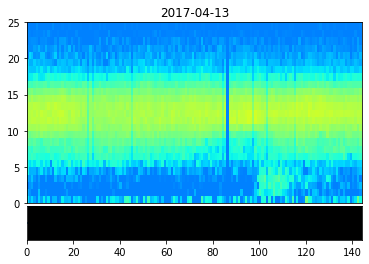

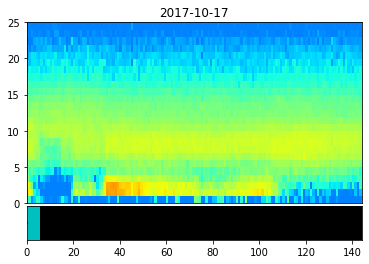

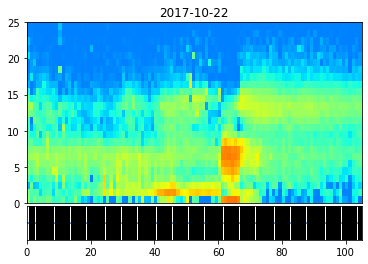

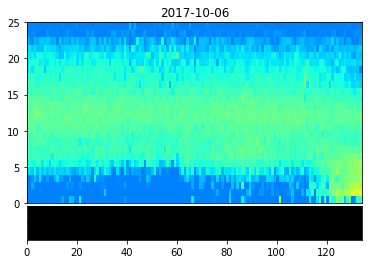

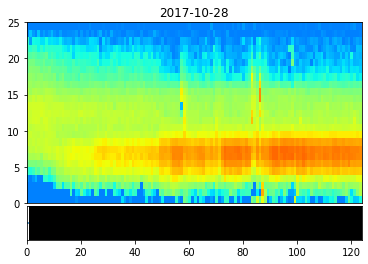

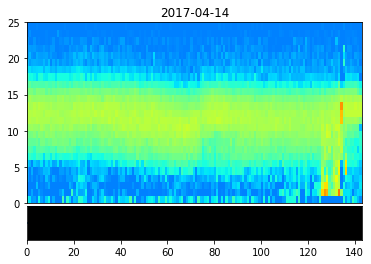

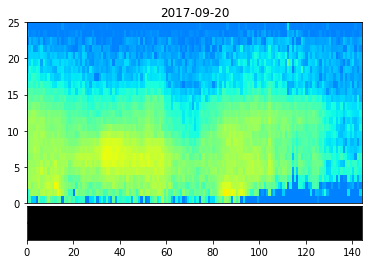

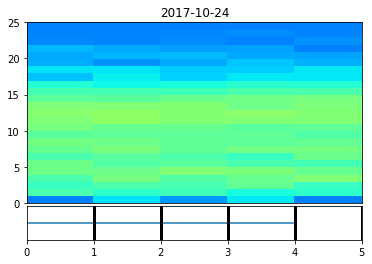

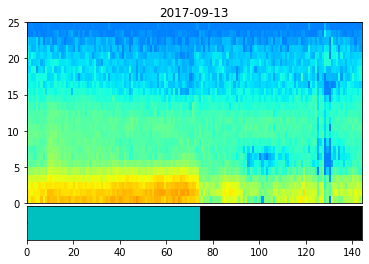

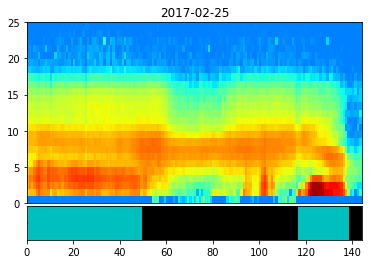

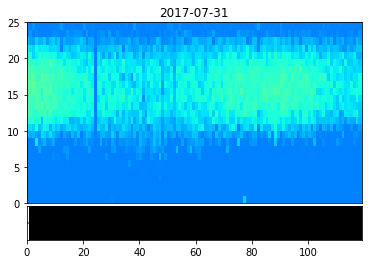

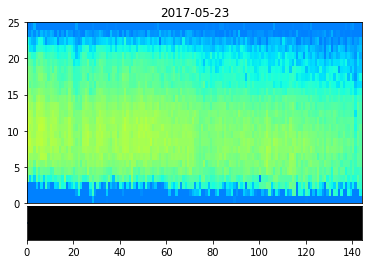

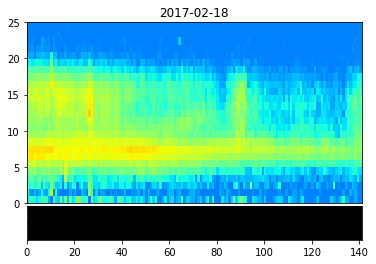

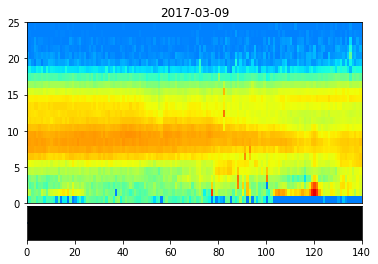

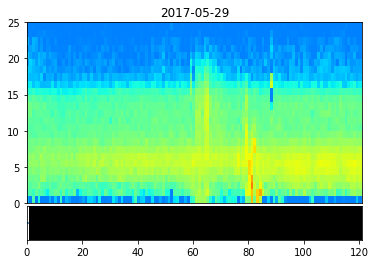

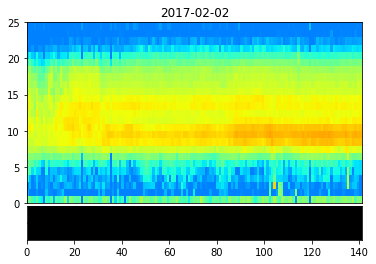

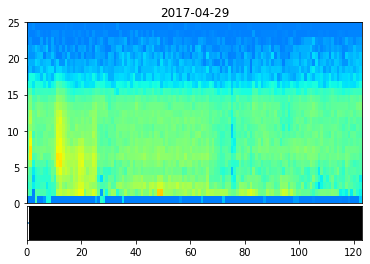

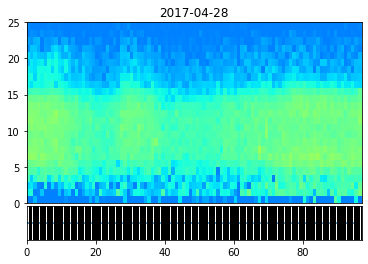

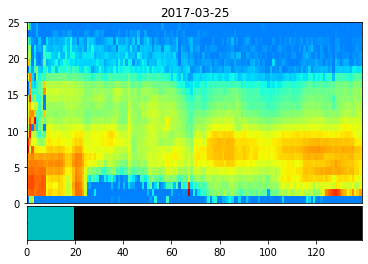

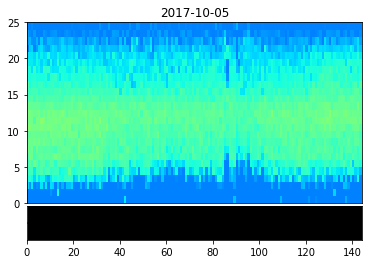

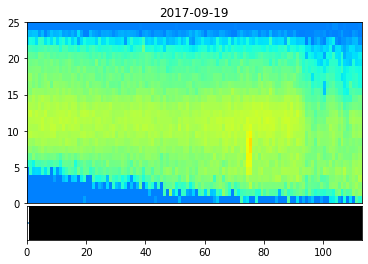

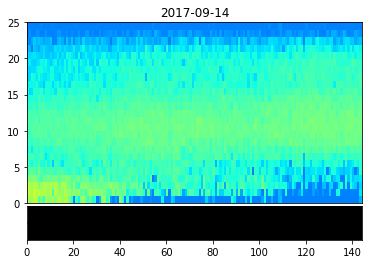

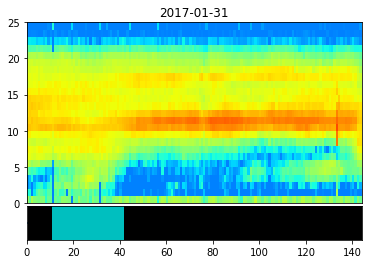

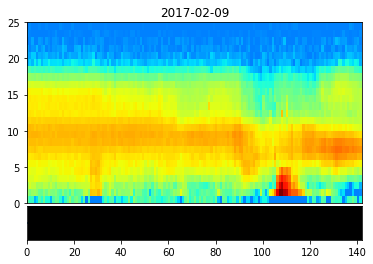

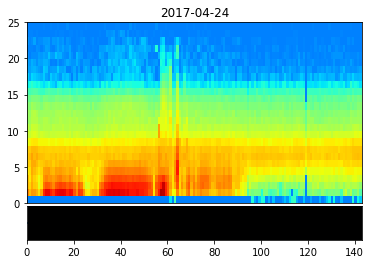

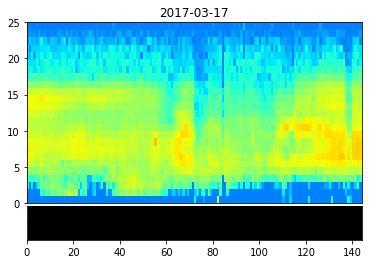

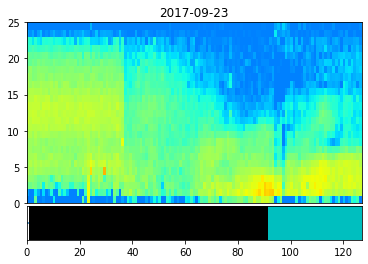

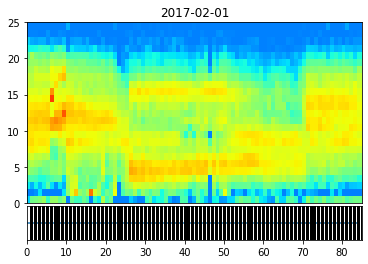

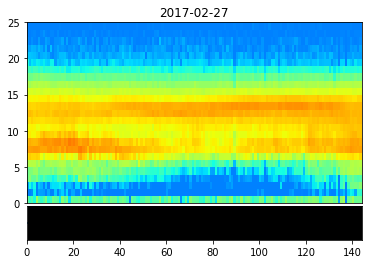

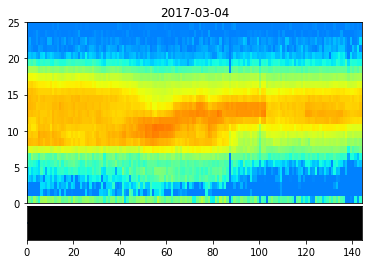

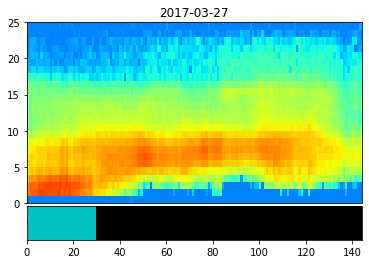

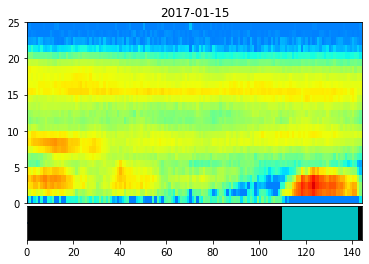

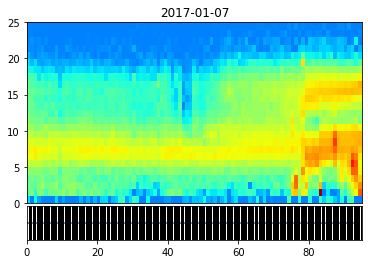

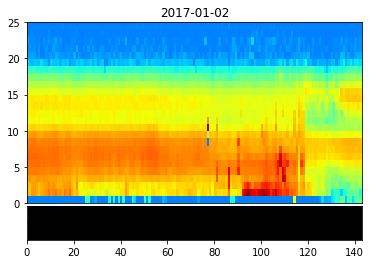

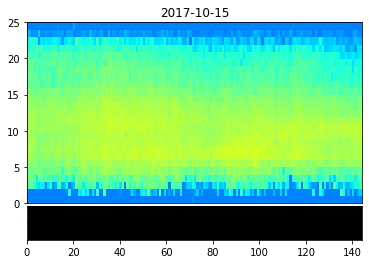

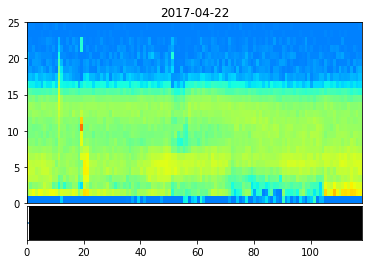

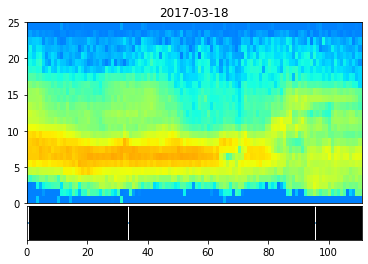

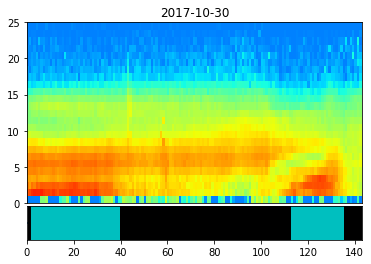

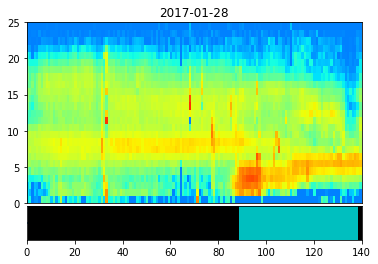

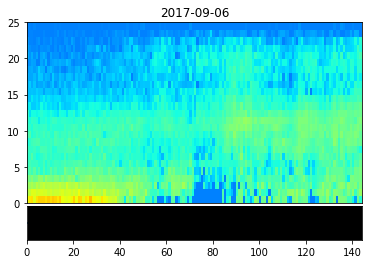

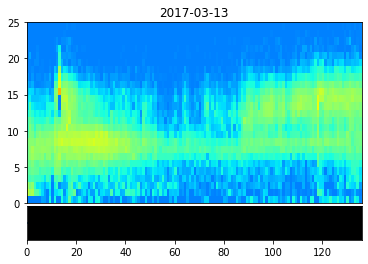

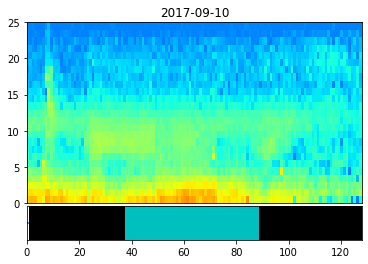

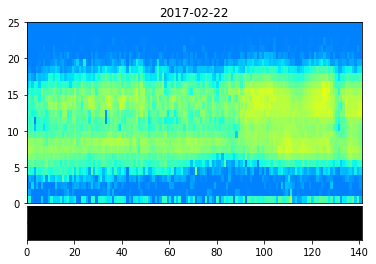

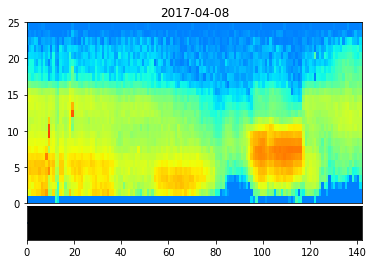

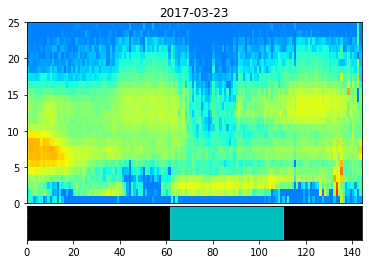

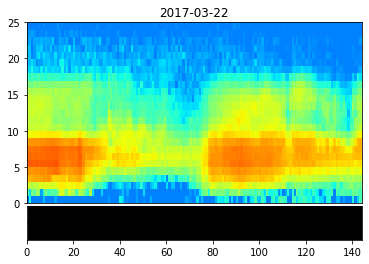

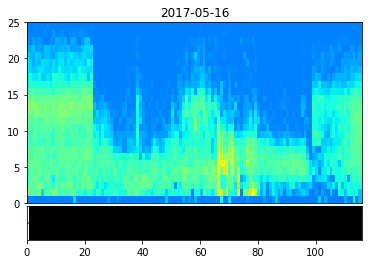

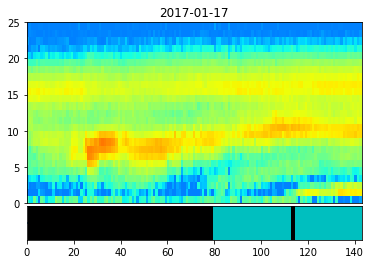

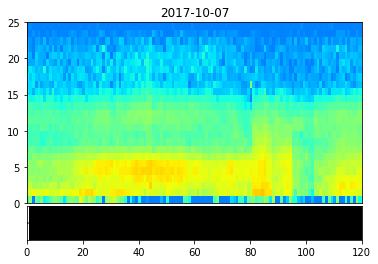

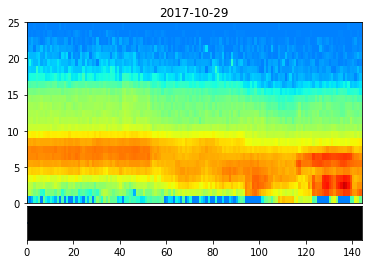

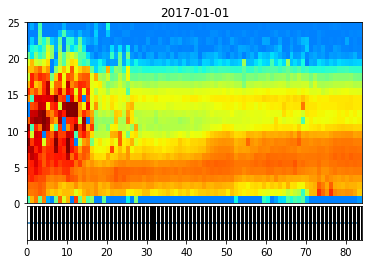

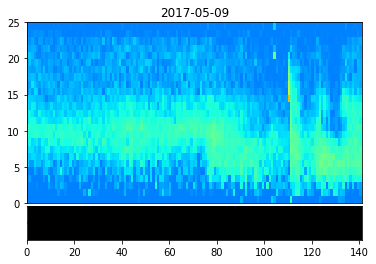

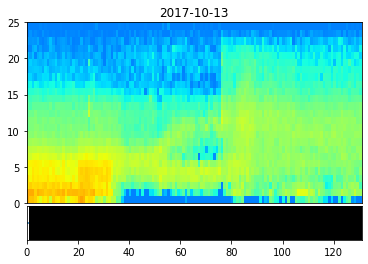

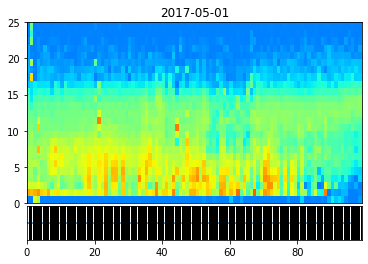

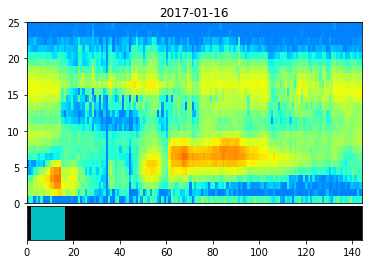

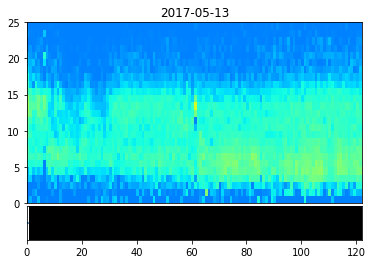

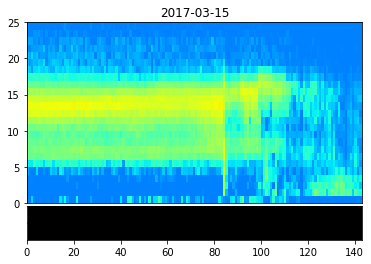

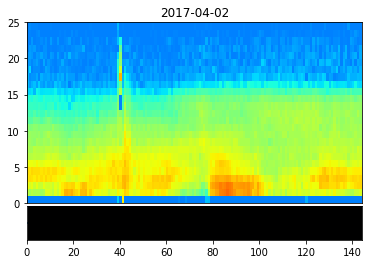

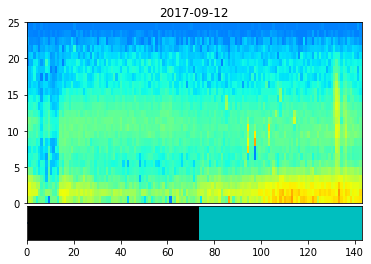

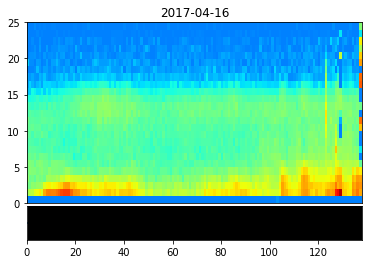

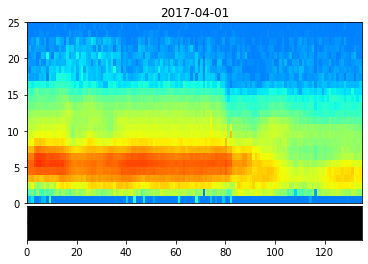

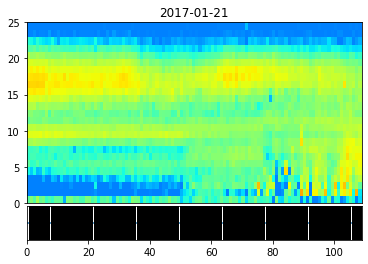

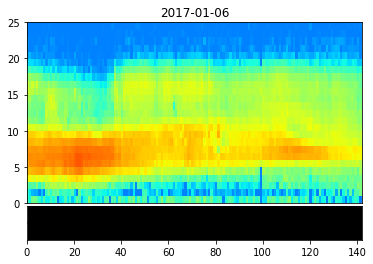

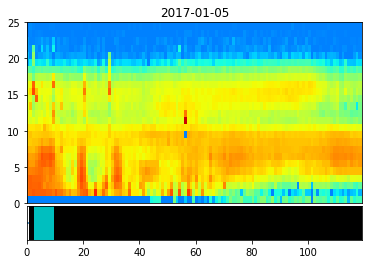

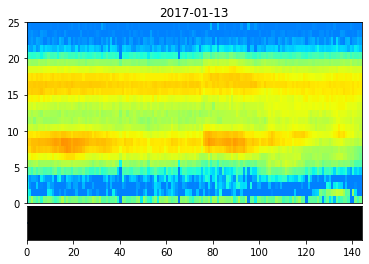

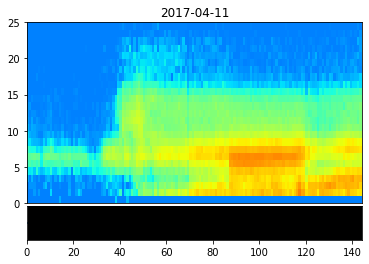

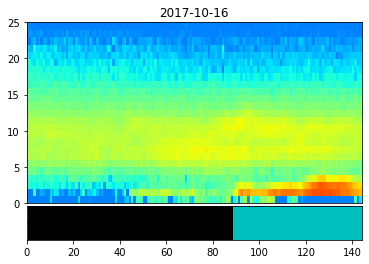

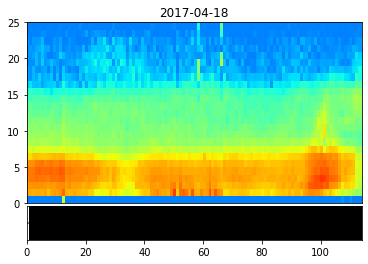

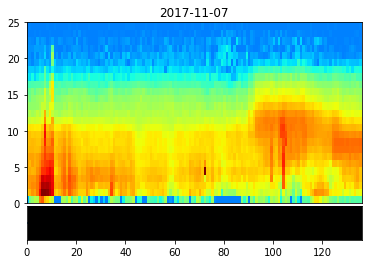

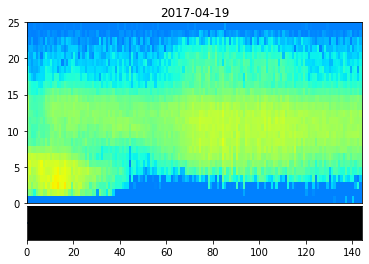

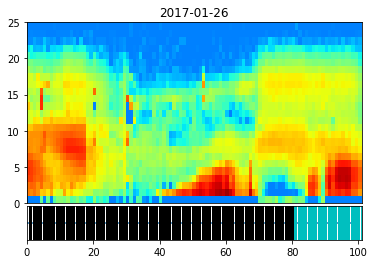

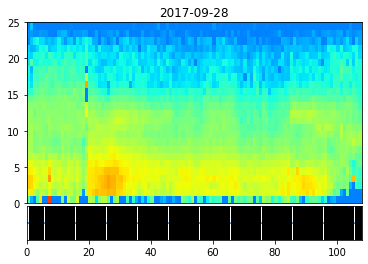

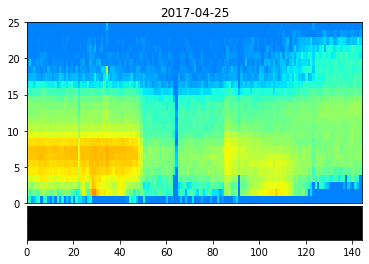

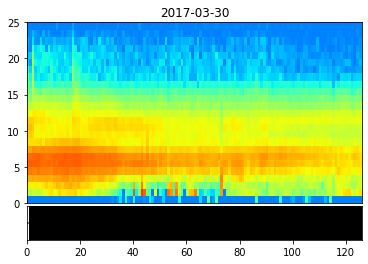

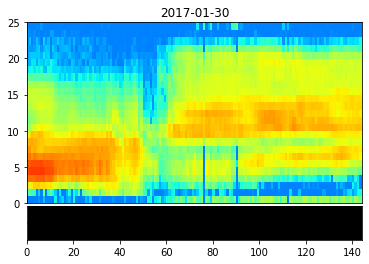

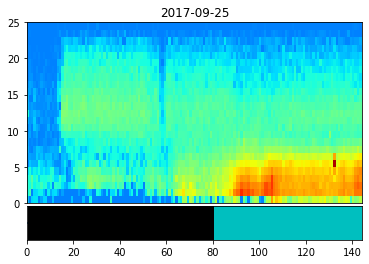

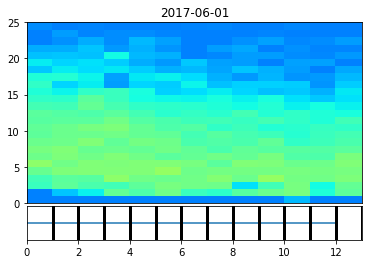

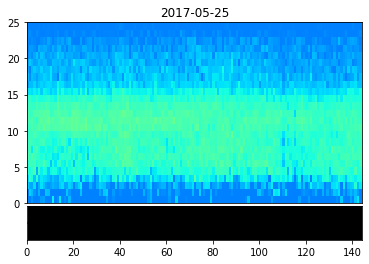

In [15]:
viz.visualize.generate_plots('real_data', X_adapt, y_adapt)

In [92]:
file = '/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A/20170126'
out_dir = '/home/gfogwil/Documentos/'

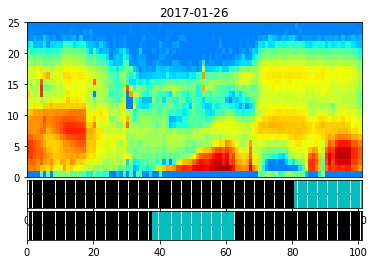

In [93]:
viz.visualize.plot_X_y1_y2(file, out_dir, y_final, results, show=True)

In [67]:
y_final

{'mlf': PosixPath('/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf'),
 'count': None,
 'id': 'test.real'}